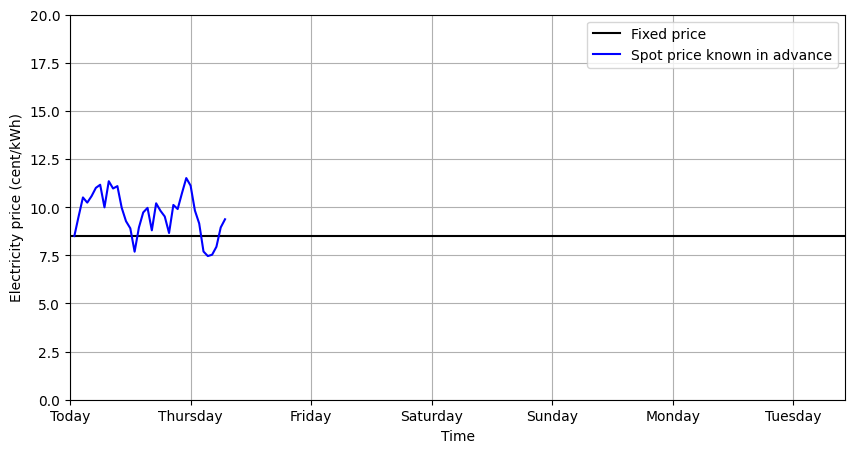

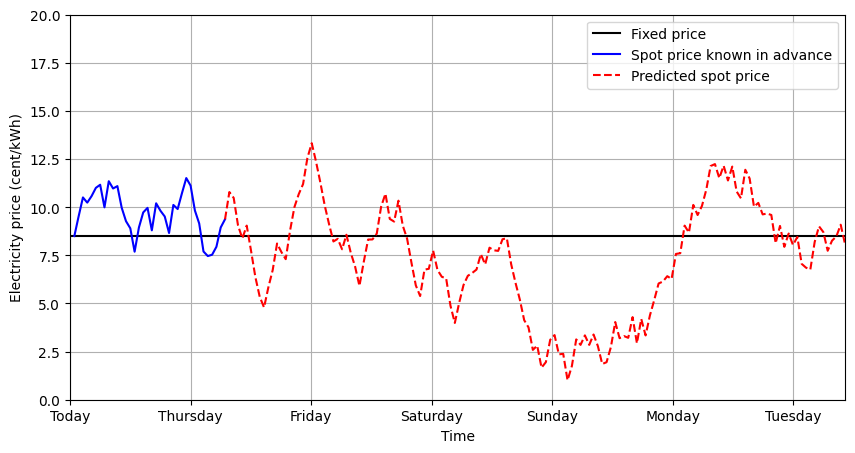

In [4]:
# Random walk to create the spotlight presentation figure
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(222)

N_SIM1 = 36
N_SIM2 = 6*24
N_SIM_TOT = N_SIM1 + N_SIM2

fixed_price = 8.5
fpa = np.ones(N_SIM_TOT) * fixed_price

sim_1 = np.zeros(N_SIM1)
sim_1[0] = 8.5 # Start from fixed price
sim_2 = np.zeros(N_SIM2)

step_prob = 0.5
for i in range(1, N_SIM1):
    step = np.random.rand()
    if step < step_prob:
        coef = -1
    else:
        coef = 1
    sim_1[i] = sim_1[i-1] + coef * np.random.rand() * 1.5

sim_2[0] = sim_1[len(sim_1)-1]
for j in range(1, N_SIM2):
    step = np.random.rand()
    if step < step_prob:
        coef = -1
    else:
        coef = 1
    sim_2[j] = sim_2[j-1] + coef * np.random.rand() * 1.5


def plot_for_spotlight(include_prediction):
    plt.figure(figsize=(10,5))
    plt.plot(np.linspace(0, N_SIM_TOT, N_SIM_TOT), fpa, color='black', label='Fixed price')
    plt.plot(np.linspace(1, N_SIM1, N_SIM1), sim_1, color='blue', label='Spot price known in advance')
    if include_prediction:
        plt.plot(np.linspace(N_SIM1, N_SIM1+N_SIM2, N_SIM2), sim_2, color='red', linestyle='dashed', label='Predicted spot price')
    plt.grid(True)
    plt.xlabel('Time')
    plt.xticks(np.linspace(0,7,7)*24, ['Today', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'])
    plt.ylabel('Electricity price (cent/kWh)')
    plt.ylim([0, 20])
    plt.xlim([0, N_SIM_TOT])
    plt.legend()
    plt.show()

# Plot without prediction
plot_for_spotlight(False)

# Plot with prediction
plot_for_spotlight(True)
